### Import Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

in_file = 'train.csv'
full_data = pd.read_csv(in_file)
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Explore

In [4]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
full_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Data Engineering

In [2]:
full_data['Age']=full_data['Age'].fillna(full_data['Age'].median())
full_data['Name']=full_data['Name'].apply(lambda x:len(x))
full_data['Embarked']=full_data['Embarked'].fillna('S')

full_data['Family']=full_data['SibSp']+full_data['Parch']

full_data.loc[full_data['Sex']=='male','Sex']=0
full_data.loc[full_data['Sex']=='female','Sex']=1
full_data.loc[full_data['Embarked']=='S','Embarked']=0
full_data.loc[full_data['Embarked']=='C','Embarked']=1
full_data.loc[full_data['Embarked']=='Q','Embarked']=2

new_data=full_data.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket'], axis = 1)
new_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0


#### Note
+ People may have the age 0.42 because it is a baby.And i think we should also take them into consideration.

In [6]:
new_data.describe()

,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.904602
std,0.486592,0.836071,13.019697,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


In [8]:
new_data[new_data['Age']<1]

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
78,1,2,0,0.83,29.0000,0,2
305,1,1,0,0.92,151.5500,0,3
469,1,3,1,0.75,19.2583,1,3
644,1,3,1,0.75,19.2583,1,3
755,1,2,0,0.67,14.5000,0,2
803,1,3,0,0.42,8.5167,1,1
831,1,2,0,0.83,18.7500,0,2


In [19]:
from IPython.display import display
import scipy
for feature in new_data.keys():
    Q1 = np.percentile(new_data[feature],25) 
    Q3 = np.percentile(new_data[feature],75)
    step = 2.0*(Q3-Q1)
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(new_data[~((new_data[feature] >= Q1 - step) & (new_data[feature] <= Q3 + step))])
 

Data points considered outliers for the feature 'Survived':


,Survived,Pclass,Sex,Age,Fare,Embarked,Family


Data points considered outliers for the feature 'Pclass':


,Survived,Pclass,Sex,Age,Fare,Embarked,Family


Data points considered outliers for the feature 'Sex':


,Survived,Pclass,Sex,Age,Fare,Embarked,Family


Data points considered outliers for the feature 'Age':


,Survived,Pclass,Sex,Age,Fare,Embarked,Family
33,0,2,0,66.0,10.5000,0,0
54,0,1,0,65.0,61.9792,1,1
96,0,1,0,71.0,34.6542,1,0
116,0,3,0,70.5,7.7500,2,0
252,0,1,0,62.0,26.5500,0,0
275,1,1,1,63.0,77.9583,0,1
280,0,3,0,65.0,7.7500,2,0
438,0,1,0,64.0,263.0000,0,5
456,0,1,0,65.0,26.5500,0,0
483,1,3,1,63.0,9.5875,0,0


Data points considered outliers for the feature 'Fare':


,Survived,Pclass,Sex,Age,Fare,Embarked,Family
27,0,1,0,19.00,263.0000,0,5
31,1,1,1,28.00,146.5208,1,1
34,0,1,0,28.00,82.1708,1,1
61,1,1,1,38.00,80.0000,0,0
62,0,1,0,45.00,83.4750,0,1
88,1,1,1,23.00,263.0000,0,5
102,0,1,0,21.00,77.2875,0,1
118,0,1,0,24.00,247.5208,1,1
124,0,1,0,54.00,77.2875,0,1
139,0,1,0,24.00,79.2000,1,0


Data points considered outliers for the feature 'Embarked':


,Survived,Pclass,Sex,Age,Fare,Embarked,Family


Data points considered outliers for the feature 'Family':


,Survived,Pclass,Sex,Age,Fare,Embarked,Family
7,0,3,0,2.0,21.0750,0,4
13,0,3,0,39.0,31.2750,0,6
16,0,3,0,2.0,29.1250,2,5
24,0,3,1,8.0,21.0750,0,4
25,1,3,1,38.0,31.3875,0,6
27,0,1,0,19.0,263.0000,0,5
50,0,3,0,7.0,39.6875,0,5
59,0,3,0,11.0,46.9000,0,7
63,0,3,0,4.0,27.9000,0,5
68,1,3,1,17.0,7.9250,0,6


### Figuring

Populating the interactive namespace from numpy and matplotlib


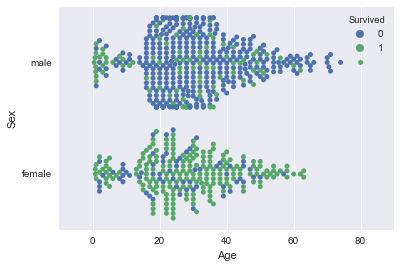

In [3]:
import matplotlib.pyplot as plt
%pylab inline
sns.swarmplot(x='Age',y='Sex',hue='Survived',data=full_data)

Populating the interactive namespace from numpy and matplotlib


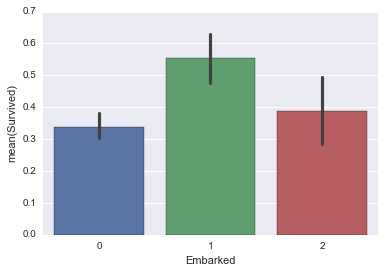

In [9]:
sns.barplot(x='Embarked',y='Survived',data=new_data)

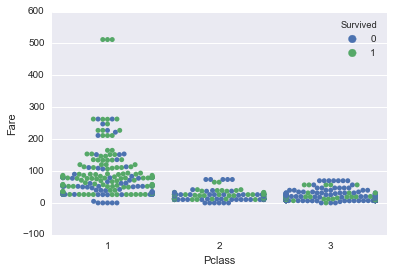

In [13]:
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=new_data)

Populating the interactive namespace from numpy and matplotlib


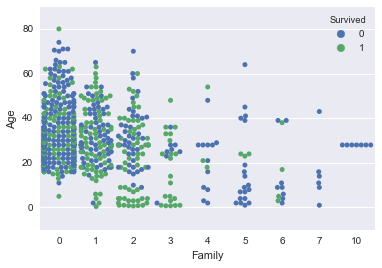

In [10]:
sns.swarmplot(x='Family',y='Age',hue='Survived',data=new_data)

### Split Data

In [3]:
y_all=new_data['Survived']
X_all=new_data.drop('Survived', axis = 1)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20, random_state=20)

### Benchmark

In [5]:
from sklearn import linear_model
linear_clf = linear_model.SGDClassifier()
train_predict(linear_clf, X_train, y_train, X_test, y_test)

Trained model in 0.0054 seconds
F1 score for training set: 0.5049.
F1 score for test set: 0.5047.


### Test Model

In [4]:
import time 
from sklearn.metrics import f1_score
def train_classifier(clf, X_train, y_train):
    start = time.clock()
    clf.fit(X_train, y_train)
    end = time.clock()
    print "Trained model in {:.4f} seconds".format(end - start)

def predict_labels(clf, features, target):
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred)


def train_predict(clf, X_train, y_train, X_test, y_test):
    train_classifier(clf, X_train, y_train)
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [7]:
from sklearn import svm
clf1 = svm.SVC()

from sklearn.neighbors import KNeighborsClassifier
clf2=KNeighborsClassifier()

from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier()

In [8]:
X_train_1=X_train[:230]
X_train_2=X_train[:460]
X_train_3=X_train

y_train_1=y_train[:230]
y_train_2=y_train[:460]
y_train_3=y_train

In [9]:
print "SVM"
train_predict(clf1, X_train_1, y_train_1, X_test, y_test)
train_predict(clf1, X_train_2, y_train_2, X_test, y_test)
train_predict(clf1, X_train_3, y_train_3, X_test, y_test)
print "KNN"
train_predict(clf2, X_train_1, y_train_1, X_test, y_test)
train_predict(clf2, X_train_2, y_train_2, X_test, y_test)
train_predict(clf2, X_train_3, y_train_3, X_test, y_test)
print "RandomForest"
train_predict(clf3, X_train_1, y_train_1, X_test, y_test)
train_predict(clf3, X_train_2, y_train_2, X_test, y_test)
train_predict(clf3, X_train_3, y_train_3, X_test, y_test)

SVM
Trained model in 0.0080 seconds
F1 score for training set: 0.8765.
F1 score for test set: 0.3810.
Trained model in 0.0200 seconds
F1 score for training set: 0.8546.
F1 score for test set: 0.4000.
Trained model in 0.0269 seconds
F1 score for training set: 0.8803.
F1 score for test set: 0.4038.
KNN
Trained model in 0.0018 seconds
F1 score for training set: 0.6341.
F1 score for test set: 0.5649.
Trained model in 0.0012 seconds
F1 score for training set: 0.6930.
F1 score for test set: 0.5600.
Trained model in 0.0011 seconds
F1 score for training set: 0.7356.
F1 score for test set: 0.5738.
RandomForest
Trained model in 0.0239 seconds
F1 score for training set: 0.9711.
F1 score for test set: 0.6349.
Trained model in 0.0238 seconds
F1 score for training set: 0.9688.
F1 score for test set: 0.7179.
Trained model in 0.0329 seconds
F1 score for training set: 0.9653.
F1 score for test set: 0.7302.


|     |Size|Time |Train Score|Test Score|
|:---:|:--:|:---:|:------:|:----:|
|SVM1 |33% |0.008| 0.877  | 0.381|
|SVM2 |66% |0.020| 0.855  | 0.400|
|SVM3 |100%|0.027| 0.880  | 0.404|

|     |Size|Time |Train Score|Test Score|
|:---:|:--:|:---:|:------:|:----:|
|KNN1 |33% |0.002| 0.634  | 0.565|
|KNN2 |66% |0.001| 0.693  | 0.560|
|KNN3 |100%|0.001| 0.736  | 0.574|

|     |Size|Time |Train Score|Test Score|
|:---:|:--:|:---:|:------:|:----:|
|Ran1 |33% |0.024| 0.971  | 0.635|
|Ran2 |66% |0.024| 0.969  | 0.718|
|Ran3 |100%|0.033| 0.965  | 0.730|

### Tune Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,f1_score
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
import time
start=time.clock()
parameters = {'n_estimators': [10,20,40,80],'criterion':['gini','entropy']
              ,'max_features':['log2','sqrt',None],'max_depth':[5,6,7,8],'min_samples_split':[1,2,3]
              ,'warm_start':[False,True]}

cv_sets = cross_validation.ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

clf = RandomForestClassifier()
 
f1_scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(clf,param_grid=parameters,scoring=f1_scorer,cv=cv_sets)

grid_obj=grid_obj.fit(X_train, y_train)

clf = grid_obj.best_estimator_

end=time.clock()

print grid_obj.best_estimator_.get_params()

print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
print "Optimize model in {:.4f} seconds".format(end - start)

{'warm_start': True, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 40, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': None, 'max_features': 'sqrt', 'max_depth': 8, 'class_weight': None}
Tuned model has a training F1 score of 0.8690.
Tuned model has a testing F1 score of 0.7350.
Optimize model in 633.5732 seconds


### Result Figure

Populating the interactive namespace from numpy and matplotlib


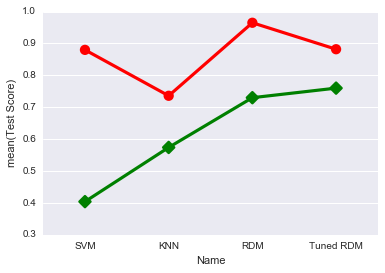

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

plot_data=pd.DataFrame({'Name':['SVM','KNN','RDM','Tuned RDM'],
                     'Train Score':[0.880,0.736,0.965,0.882],
                     'Test Score':[0.404,0.574,0.730,0.760]})
sns.pointplot(x='Name',y='Train Score',data=plot_data,markers='o',color='r')
sns.pointplot(x='Name',y='Test Score',data=plot_data,markers='D',color='g')

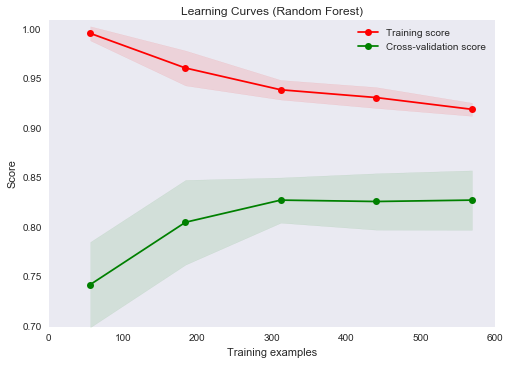

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"

plot_learning_curve(clf, title, X_train, y_train, (0.7, 1.01), cv=cv_sets, n_jobs=2)

plt.show()
